In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

notification_df = pd.read_csv('notification_sequence.csv', sep = ',')
notification_df = pd.DataFrame(notification_df)

# drop '?'
notification_df = notification_df.replace('?', pd.NaT)    
notification_df = notification_df.dropna(axis=0)

# label encoding
X_categorical_col = ['gender', 'department', 'scenario']
y_categorical_col = ['tol_111111', 'tol_1122', 'tol_123', 'tol_222', 'tol_24', 'tol_15']

X = notification_df.iloc[:, :-6]
y = notification_df.iloc[:, -6:]

# X = X.drop(['view_order_top', 'view_order_middle', 'view_order_bottom'], axis=1)
print(X)
print(y)

labelencoder = LabelEncoder()
for i in X_categorical_col:
    X[i] = labelencoder.fit_transform(X[i])

le_name_mapping = []
for i in y_categorical_col:
    labelencoder.fit(y[i])
    le_name_mapping.append(dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))

# handle X with categorical in 'one-hot encode'
X = pd.get_dummies(X, columns = X_categorical_col)

    gender  age department  total_usetime social_usetime  \
0        M    2         sc              2              1   
1        F    2         bi              4              4   
3        F    3         mg              4              2   
4        F    2         ee              3              1   
5        M    2         cs              2              1   
..     ...  ...        ...            ...            ...   
843      F    2         ee              3              1   
844      F    4         ot              2              0   
845      F    2         mg              3              2   
846      F    2         oe              4              2   
847      M    2         cs              3              1   

    communication_usetime entertainment_usetime news_usetime system_usetime  \
0                       0                     2            1              0   
1                       4                     2            2              0   
3                       1                 

In [66]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

def plot_confusion_matrix(confusion_mat, class_names):
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.matshow(confusion_mat, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(confusion_mat.shape[0]):
        for j in range(confusion_mat.shape[1]):
            ax.text(x=j, y=i, s=format(confusion_mat[i,j], '.4f'), va='center', ha='center')
    plt.xticks(np.arange(len(class_names)), class_names)
    plt.yticks(np.arange(len(class_names)), class_names)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix\n')

def holdout_func(X, y, mod):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
        
    print("Classification accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

    confusion_mat = metrics.confusion_matrix(y_test, y_pred, labels=class_names)
    plot_confusion_matrix(confusion_mat, class_names)


def KFold_func(X, y, num_split, mod):
    kf = KFold(n_splits=num_split, shuffle=False)

    y_pred_sum = 0
    confusion_mat_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        mod.fit(X_train, y_train)
        y_pred = mod.predict(X_test)
        y_pred_sum += metrics.accuracy_score(y_test, y_pred)
        confusion_mat_list.append(metrics.confusion_matrix(y_test, y_pred, labels=class_names))
        
    print("Classification accuracy:", y_pred_sum / kf.get_n_splits(kf))
    print(metrics.classification_report(y_test, y_pred))

    mean_confusion_mat = np.mean(confusion_mat_list, axis=0)
    plot_confusion_matrix(mean_confusion_mat, class_names)

Classification accuracy: 0.512396694214876
              precision    recall  f1-score   support

      censwy       0.51      0.85      0.63       117
      ecnswy       0.00      0.00      0.00         9
      nceswy       0.53      0.29      0.38        82
      scenwy       0.50      0.04      0.07        26
      wcensy       0.00      0.00      0.00         7
      ycensw       0.00      0.00      0.00         1

    accuracy                           0.51       242
   macro avg       0.26      0.20      0.18       242
weighted avg       0.48      0.51      0.44       242



<function matplotlib.pyplot.show(*args, **kw)>

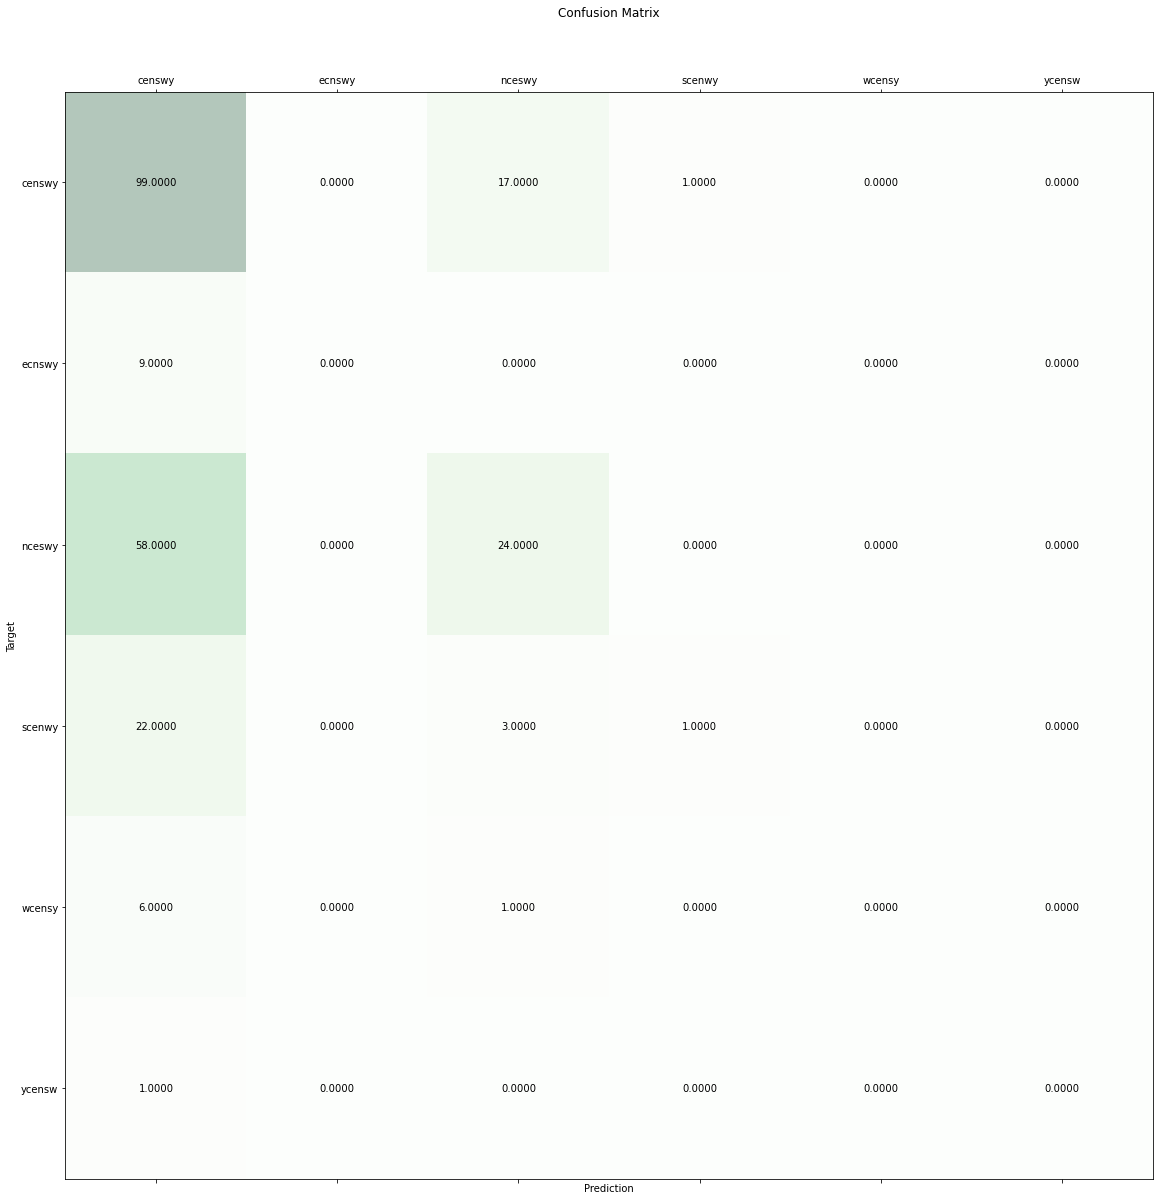

In [67]:

X = preprocessing.normalize(X)
class_names = list(le_name_mapping[5].keys())
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
holdout_func(X, y.iloc[:,5], clf)
plt.show

